In [21]:
import pickle
from collections import defaultdict
import numpy as np
#face_dict = defaultdict(np.array)
#face_count = defaultdict(np.array)
#with open('database.pkl', 'wb') as handle:
    #pickle.dump(face_dict, handle)

In [25]:
z = np.loadtxt('identity_CelebA.txt',dtype=str)

In [27]:
from camera import take_picture
from dlib_models import download_model, download_predictor, load_dlib_models
download_model()
download_predictor()
from dlib_models import models
import skimage.io as io
import os
import matplotlib.pyplot as plt
from camera import take_picture

load_dlib_models()
face_detect = models["face detect"]
face_rec_model = models["face rec"]
shape_predictor = models["shape predict"]

with open('database.pkl', 'rb') as handle:
    face_dict = pickle.load(handle)

def LogPic(face_data, label):
    if not face_dict: 
        face_count[label] = 1
        face_dict[label] = face_data
    elif face_dict.get(label) is None:
        face_count[label] = 1
        face_dict[label] = face_data
    else:
        face_count[label] += 1
        face_dict[label] += face_data

def uploadimage(imgpath):
    pic = io.imread(imgpath)
    return pic

def makedescriptors(pic1):
    try:
        detections = list(face_detect(pic1))
        shape = shape_predictor(pic1, detections[0])
        descriptor1 = np.array(face_rec_model.compute_face_descriptor(pic1,shape))
    except:
        return None
    return descriptor1

for i,filename in enumerate(os.listdir('./pics2')):
    if filename.endswith(".jpg"):
        x = uploadimage('./pics2/'+filename)
        x = makedescriptors(x)
        if x is None:
            print(i)
            continue
        LogPic(x,z[i,1])
        continue
    else:
        continue
for key in face_dict:
    face_dict[key] = face_dict[key]/face_count[key]
print("Start pickling my dudes")
with open('database.pkl', 'wb') as handle:
    pickle.dump(face_dict, handle)

File already exists:
	c:\users\ghaem\desktop\programms\beaver\summer\dlib\dlibmodels\dlib_models\dlib_face_recognition_resnet_model_v1.dat
File already exists:
	c:\users\ghaem\desktop\programms\beaver\summer\dlib\dlibmodels\dlib_models\shape_predictor_68_face_landmarks.dat
2
3
35
66
119
136
148
149
158
165
166
198
223
292
416
425
433
452
556
602
626
806
881
887
982
1119
1162
1183
1254
1297
1337
1343
1400
1440
1468
1505
1605
1651
1676
1703
1793
1877
1939
1945
1956
2012
2013
2060
2145
2200
2213
2248
2267
2285
2294
2314
2344
2345
2347
2416
2447
2459
2512
2582
2696
2728
2828
2901
2919
2961
2971
3012
3054
3130
3135
3142
3168
3171
3211
3319
3382
3399
3454
3492
3514
3564
3639
3731
3757
3785
3823
3824
3853
3907
3927
3945
3979
4009
4043
4103
4112
4150
4222
4251
4352
4384
4415
4595
4601
4686
4688
4699
4707
4755
4862
4866
4882
4887
4931
4932
4942
5028
5032
5093
5194
5197
5206
5239
5256
5282
5296
5337
5397
5410
5428
5437
5607
5621
5667
5692
5699
5707
5803
5836
5960
5978
5980
5984
5999
6009
6048
61

58255
58282
58360
58409
58417
58439
58442
58456
58534
58560
Start pickling my dudes


In [28]:
with open('database.pkl', 'rb') as handle:
        hello = pickle.load(handle)
#print(hello)

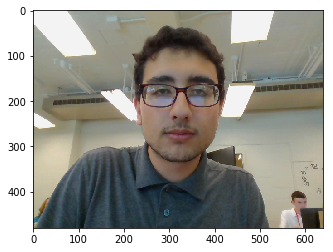

In [34]:
fig,ax = plt.subplots()
pic = take_picture()
ax.imshow(pic)

In [35]:
detections2 = list(face_detect(pic))
shape = shape_predictor(pic, detections2[0])
descriptor2 = np.array(face_rec_model.compute_face_descriptor(pic, shape))

In [36]:
print(np.sqrt(np.sum((hello["2880"]-descriptor2)**2)))

0.743377433156034


In [129]:
z[0,1]

'2880'

In [ ]:
def pairwise_dists(x, y):
    """ Computing pairwise distances using memory-efficient
        vectorization.

        Parameters
        ----------
        x : numpy.ndarray, shape=(M, D)
        y : numpy.ndarray, shape=(N, D)

        Returns
        -------
        numpy.ndarray, shape=(M, N)
            The Euclidean distance between each pair of
            rows between `x` and `y`."""
    dists = -2 * np.matmul(x, y.T)
    dists +=  np.sum(x**2, axis=1)[:, np.newaxis]
    dists += np.sum(y**2, axis=1)
    return  np.sqrt(dists)

In [15]:
def makedescriptors(pic1):
    try:
        detections = list(face_detect(pic1))
        shape = shape_predictor(pic1, detections[0])
        descriptor1 = np.array(face_rec_model.compute_face_descriptor(pic1,shape))
    except:
        return None
    return descriptor1
def LogPic(face_data, label):
    face_count[label] = 0
    if not face_dict: 
        face_count[label] = 1
        face_dict[label] = face_data
    elif face_dict.get(label) is None:
        face_count[label] = 1
        face_dict[label] = face_data
    else:
        face_count[label] += 1
        face_dict[label] += face_data

def uploadimage(imgpath):
    pic = io.imread(imgpath)
    return pic

In [16]:
import os
import pickle
from collections import defaultdict
import numpy as np
from camera import take_picture
from dlib_models import download_model, download_predictor, load_dlib_models
download_model()
download_predictor()
from dlib_models import models
import skimage.io as io
import os
import matplotlib.pyplot as plt
from camera import take_picture
face_dict = defaultdict(np.array)
face_count = defaultdict(np.array)

load_dlib_models()
face_detect = models["face detect"]
face_rec_model = models["face rec"]
shape_predictor = models["shape predict"]

with open('database.pkl', 'rb') as handle: #Gets values of database and stores it in dictionary
    face_dict = pickle.load(handle)

print("Do you want to take a picture (0) or use a stored picture (1) for database?")
mode = int(input())
print("What is the name of the input face?")
person = input() #Gets the name of the face
if mode==0:
    print("Say cheese!")
    cheese = input()
    pic = take_picture()
    x = makedescriptors(pic)
    print(x)
    if x is None: #Skips if no face is detected to stop error
        print("Oof, I didn't see a face :(")
    else:
        LogPic(x,person)

elif mode==1:
    for i,filename in enumerate(os.listdir('.')): #Finds the images in directory that are .png and sets their descriptors for person
        if filename.endswith(".png"):
            x = uploadimage(filename)
            x = makedescriptors(x)
            if x is None: #Skips if no face is detected to stop error
                print(i)
                continue
            LogPic(x,person)
            continue
        else:
            continue
face_dict[person] = face_dict[person]/face_count[person] #Gets mean of the sum of images
print("Start pickling my dudes")
with open('database.pkl', 'wb') as handle: #Packs new dictionary into database
    pickle.dump(face_dict, handle)

File already exists:
	c:\users\ghaem\desktop\programms\beaver\summer\dlib\dlibmodels\dlib_models\dlib_face_recognition_resnet_model_v1.dat
File already exists:
	c:\users\ghaem\desktop\programms\beaver\summer\dlib\dlibmodels\dlib_models\shape_predictor_68_face_landmarks.dat
Do you want to take a picture (0) or use a stored picture (1) for database?
0
What is the name of the input face?
Mohammad
Say cheese!
che
[-1.38290465e-01  7.67210945e-02  7.42106587e-02 -3.96987423e-02
 -7.98606575e-02  4.30800468e-02 -1.21004947e-01 -2.90535800e-02
  1.18746944e-01 -1.16234563e-01  1.46412760e-01 -2.53616832e-03
 -1.74273863e-01  3.11283898e-02 -8.49534720e-02  1.37003243e-01
 -1.42524451e-01 -1.03184059e-01 -6.41874000e-02 -8.90498757e-02
  5.59573388e-03  6.46954179e-02 -5.44629395e-02  7.57277980e-02
 -1.44539252e-01 -3.54236126e-01 -8.34530294e-02 -1.19833723e-01
 -7.32679293e-03 -7.92712644e-02 -4.61658984e-02  2.05489509e-02
 -6.17473200e-02  4.32323143e-02  3.30886468e-02  8.23624358e-02
 -

In [14]:
face_count["Mohammad"] = 1